In [1]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("Set2")

print("All libraries loaded successfully")
print("Ready to start the sales prediction project")

All libraries loaded successfully
Ready to start the sales prediction project


In [2]:
# Since we need a dataset with Date, Product, Quantity, and Price
# Let's create a realistic sample dataset

# Generate dates for the last 12 months
start_date = pd.to_datetime('2024-01-01')
dates = pd.date_range(start=start_date, periods=365, freq='D')

# Create sample data
np.random.seed(42)

products = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones']
data = []

for date in dates:
    for product in products:
        # Add some seasonality and trends
        base_quantity = np.random.randint(5, 20)
        seasonal_factor = 1 + 0.3 * np.sin(2 * np.pi * date.month / 12)
        quantity = int(base_quantity * seasonal_factor)

        # Price varies by product
        if product == 'Laptop':
            price = np.random.uniform(45000, 55000)
        elif product == 'Monitor':
            price = np.random.uniform(15000, 20000)
        elif product == 'Keyboard':
            price = np.random.uniform(1500, 3000)
        elif product == 'Mouse':
            price = np.random.uniform(500, 1500)
        else:  # Headphones
            price = np.random.uniform(2000, 5000)

        data.append({
            'Date': date,
            'Product': product,
            'Quantity': quantity,
            'Price': round(price, 2)
        })

# Create DataFrame
sales_data = pd.DataFrame(data)

# Calculate total sales
sales_data['Total_Sales'] = sales_data['Quantity'] * sales_data['Price']

print("Sample dataset created successfully")
print(f"Total records: {len(sales_data)}")
print("\nFirst few rows of the dataset:")
print(sales_data.head(10))

Sample dataset created successfully
Total records: 1825

First few rows of the dataset:
        Date     Product  Quantity     Price  Total_Sales
0 2024-01-01      Laptop        12  52965.43    635585.16
1 2024-01-01       Mouse        21   1231.99     25871.79
2 2024-01-01    Keyboard        19   2395.28     45510.32
3 2024-01-01     Monitor        16  15779.97    252479.52
4 2024-01-01  Headphones        17   3377.75     57421.75
5 2024-01-02      Laptop        10  51011.15    510111.50
6 2024-01-02       Mouse        13   1150.89     14961.57
7 2024-01-02    Keyboard        10   2954.86     29548.60
8 2024-01-02     Monitor        18  19692.76    354469.68
9 2024-01-02  Headphones         6   2545.47     15272.82


In [3]:
# Save the dataset
sales_data.to_csv('sales_data.csv', index=False)
print("Dataset saved as sales_data.csv")

# Display basic information
print("\nDataset Information:")
print("="*60)
print(f"Date Range: {sales_data['Date'].min()} to {sales_data['Date'].max()}")
print(f"Number of Products: {sales_data['Product'].nunique()}")
print(f"Products: {sales_data['Product'].unique()}")
print(f"Total Records: {len(sales_data)}")

print("\nDataset Structure:")
print(sales_data.info())

print("\nBasic Statistics:")
print(sales_data.describe())

Dataset saved as sales_data.csv

Dataset Information:
Date Range: 2024-01-01 00:00:00 to 2024-12-30 00:00:00
Number of Products: 5
Products: ['Laptop' 'Mouse' 'Keyboard' 'Monitor' 'Headphones']
Total Records: 1825

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1825 non-null   datetime64[ns]
 1   Product      1825 non-null   object        
 2   Quantity     1825 non-null   int64         
 3   Price        1825 non-null   float64       
 4   Total_Sales  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 71.4+ KB
None

Basic Statistics:
                      Date     Quantity         Price   Total_Sales
count                 1825  1825.000000   1825.000000  1.825000e+03
mean   2024-07-01 00:00:00    11.560548  14845.883759  1.720734e+05
min    

In [4]:
# Check for missing values
print("Checking for missing values:")
print(sales_data.isnull().sum())

# Ensure Date column is in datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract useful time features
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Month_Name'] = sales_data['Date'].dt.month_name()
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Quarter'] = sales_data['Date'].dt.quarter

print("\nData preparation completed")
print("New columns added: Year, Month, Month_Name, Day, Week, Quarter")
print("\nUpdated dataset preview:")
print(sales_data.head())

Checking for missing values:
Date           0
Product        0
Quantity       0
Price          0
Total_Sales    0
dtype: int64

Data preparation completed
New columns added: Year, Month, Month_Name, Day, Week, Quarter

Updated dataset preview:
        Date     Product  Quantity     Price  Total_Sales  Year  Month  \
0 2024-01-01      Laptop        12  52965.43    635585.16  2024      1   
1 2024-01-01       Mouse        21   1231.99     25871.79  2024      1   
2 2024-01-01    Keyboard        19   2395.28     45510.32  2024      1   
3 2024-01-01     Monitor        16  15779.97    252479.52  2024      1   
4 2024-01-01  Headphones        17   3377.75     57421.75  2024      1   

  Month_Name  Day  Week  Quarter  
0    January    1     1        1  
1    January    1     1        1  
2    January    1     1        1  
3    January    1     1        1  
4    January    1     1        1  


In [5]:
# Calculate total sales by date
daily_sales = sales_data.groupby('Date')['Total_Sales'].sum().reset_index()

print("Overall Sales Summary:")
print("="*60)
print(f"Total Sales Amount: Rs. {sales_data['Total_Sales'].sum():,.2f}")
print(f"Average Daily Sales: Rs. {daily_sales['Total_Sales'].mean():,.2f}")
print(f"Maximum Daily Sales: Rs. {daily_sales['Total_Sales'].max():,.2f}")
print(f"Minimum Daily Sales: Rs. {daily_sales['Total_Sales'].min():,.2f}")

Overall Sales Summary:
Total Sales Amount: Rs. 314,033,956.23
Average Daily Sales: Rs. 860,367.00
Maximum Daily Sales: Rs. 1,802,061.36
Minimum Daily Sales: Rs. 232,345.41


In [6]:
# Group data by month for trend analysis
monthly_sales = sales_data.groupby(['Year', 'Month', 'Month_Name']).agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

monthly_sales = monthly_sales.sort_values(['Year', 'Month'])

print("Monthly Sales Summary:")
print("="*60)
print(monthly_sales)

# Calculate month-over-month growth
monthly_sales['Sales_Growth'] = monthly_sales['Total_Sales'].pct_change() * 100

print("\nMonth-over-Month Growth:")
print(monthly_sales[['Month_Name', 'Total_Sales', 'Sales_Growth']])

Monthly Sales Summary:
    Year  Month Month_Name  Total_Sales  Quantity
0   2024      1    January  32027677.25      2157
1   2024      2   February  31001478.06      2152
2   2024      3      March  35146775.28      2308
3   2024      4      April  31505845.43      2177
4   2024      5        May  30660787.35      2062
5   2024      6       June  27149685.25      1822
6   2024      7       July  23158411.91      1526
7   2024      8     August  20141270.43      1296
8   2024      9  September  17947809.08      1200
9   2024     10    October  18487732.52      1327
10  2024     11   November  20977728.59      1447
11  2024     12   December  25828755.08      1624

Month-over-Month Growth:
   Month_Name  Total_Sales  Sales_Growth
0     January  32027677.25           NaN
1    February  31001478.06     -3.204101
2       March  35146775.28     13.371289
3       April  31505845.43    -10.359215
4         May  30660787.35     -2.682226
5        June  27149685.25    -11.451441
6        July 

In [7]:
# Analyze sales by product
product_sales = sales_data.groupby('Product').agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

product_sales = product_sales.sort_values('Total_Sales', ascending=False)

print("Product-wise Sales Performance:")
print("="*60)
print(product_sales)

# Calculate percentage contribution
product_sales['Percentage'] = (product_sales['Total_Sales'] / product_sales['Total_Sales'].sum()) * 100

print("\nProduct Sales Contribution:")
for idx, row in product_sales.iterrows():
    print(f"{row['Product']}: {row['Percentage']:.2f}% of total sales")

Product-wise Sales Performance:
      Product   Total_Sales  Quantity         Price
2      Laptop  2.134118e+08      4261  50019.690274
3     Monitor  7.222119e+07      4132  17497.139178
0  Headphones  1.438603e+07      4199   3436.395699
1    Keyboard  9.653424e+06      4307   2240.686959
4       Mouse  4.361495e+06      4199   1035.506685

Product Sales Contribution:
Laptop: 67.96% of total sales
Monitor: 23.00% of total sales
Headphones: 4.58% of total sales
Keyboard: 3.07% of total sales
Mouse: 1.39% of total sales


In [8]:
# Perform trend analysis for future prediction
from scipy import stats

# Prepare data for trend analysis
monthly_sales['Month_Number'] = range(1, len(monthly_sales) + 1)

# Calculate linear trend
X = monthly_sales['Month_Number'].values
Y = monthly_sales['Total_Sales'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print("TASK 1: Trend Analysis Results")
print("="*60)
print(f"Trend Slope: Rs. {slope:,.2f} per month")
print(f"Trend Intercept: Rs. {intercept:,.2f}")
print(f"R-squared Value: {r_value**2:.4f}")
print(f"Correlation Strength: {'Strong' if abs(r_value) > 0.7 else 'Moderate' if abs(r_value) > 0.4 else 'Weak'}")

# Predict next month's sales
next_month_number = len(monthly_sales) + 1
predicted_sales = slope * next_month_number + intercept

print(f"\nPredicted Sales for Next Month: Rs. {predicted_sales:,.2f}")

# Calculate average of last 3 months as alternative prediction
last_3_months_avg = monthly_sales['Total_Sales'].tail(3).mean()
print(f"Average of Last 3 Months: Rs. {last_3_months_avg:,.2f}")

# Store predictions
monthly_sales['Predicted_Sales'] = slope * monthly_sales['Month_Number'] + intercept

TASK 1: Trend Analysis Results
Trend Slope: Rs. -1,322,920.26 per month
Trend Intercept: Rs. 34,768,478.04
R-squared Value: 0.6468
Correlation Strength: Strong

Predicted Sales for Next Month: Rs. 17,570,514.66
Average of Last 3 Months: Rs. 21,764,738.73


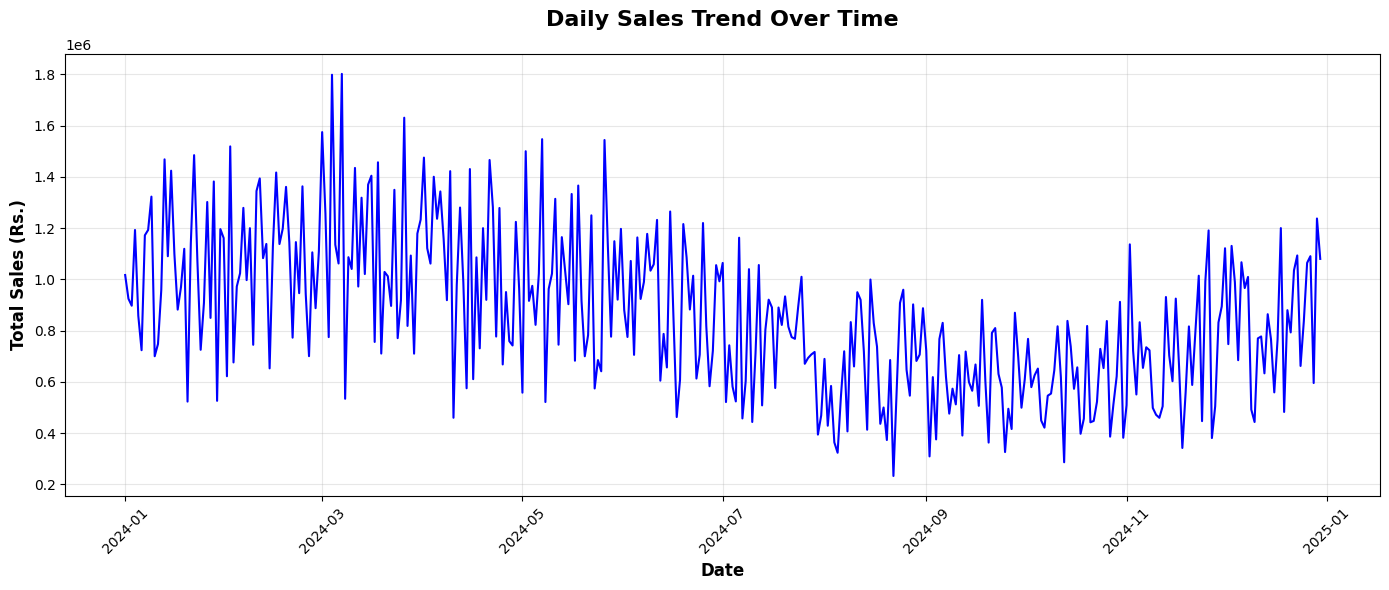

Daily sales trend visualized


In [9]:
# Task 2: Visualize trends with line chart

# Plot 1: Daily Sales Over Time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], color='blue', linewidth=1.5)
plt.title('Daily Sales Trend Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (Rs.)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Daily sales trend visualized")

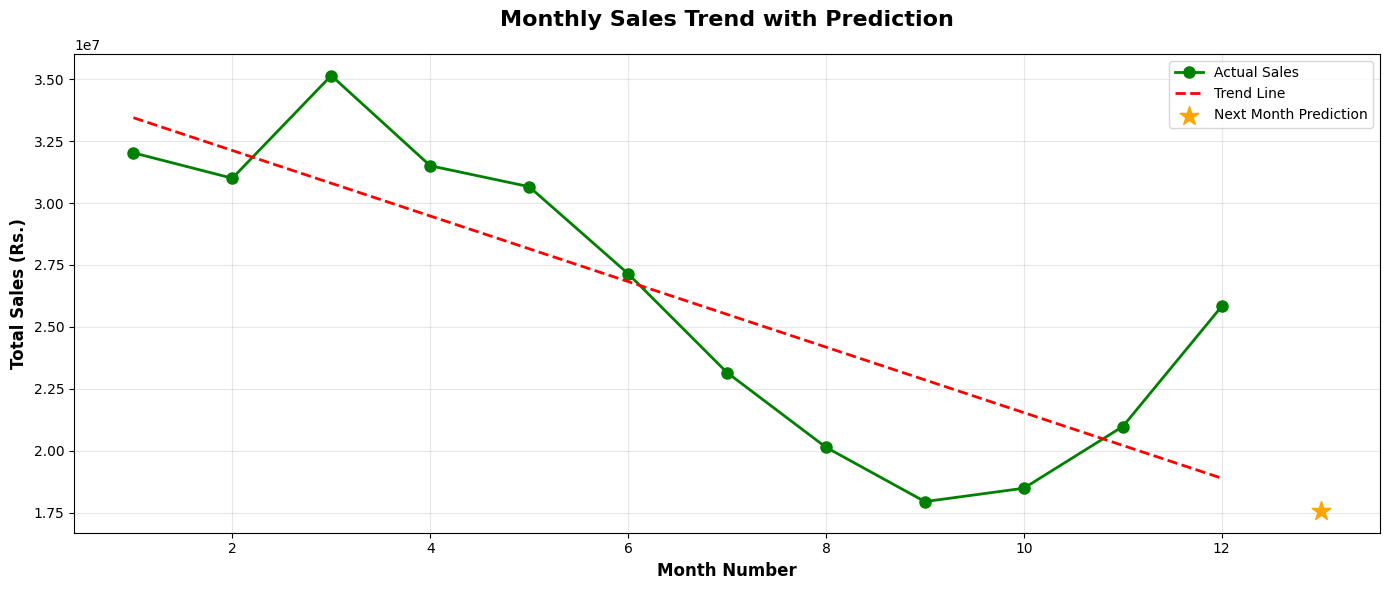

Monthly sales trend with prediction visualized


In [10]:
# Plot 2: Monthly Sales with Trend Line
plt.figure(figsize=(14, 6))

# Plot actual sales
plt.plot(monthly_sales['Month_Number'], monthly_sales['Total_Sales'],
         marker='o', color='green', linewidth=2, markersize=8, label='Actual Sales')

# Plot trend line
plt.plot(monthly_sales['Month_Number'], monthly_sales['Predicted_Sales'],
         linestyle='--', color='red', linewidth=2, label='Trend Line')

# Add prediction point
plt.scatter(next_month_number, predicted_sales, color='orange', s=200,
           marker='*', zorder=5, label='Next Month Prediction')

plt.title('Monthly Sales Trend with Prediction', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month Number', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (Rs.)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Monthly sales trend with prediction visualized")

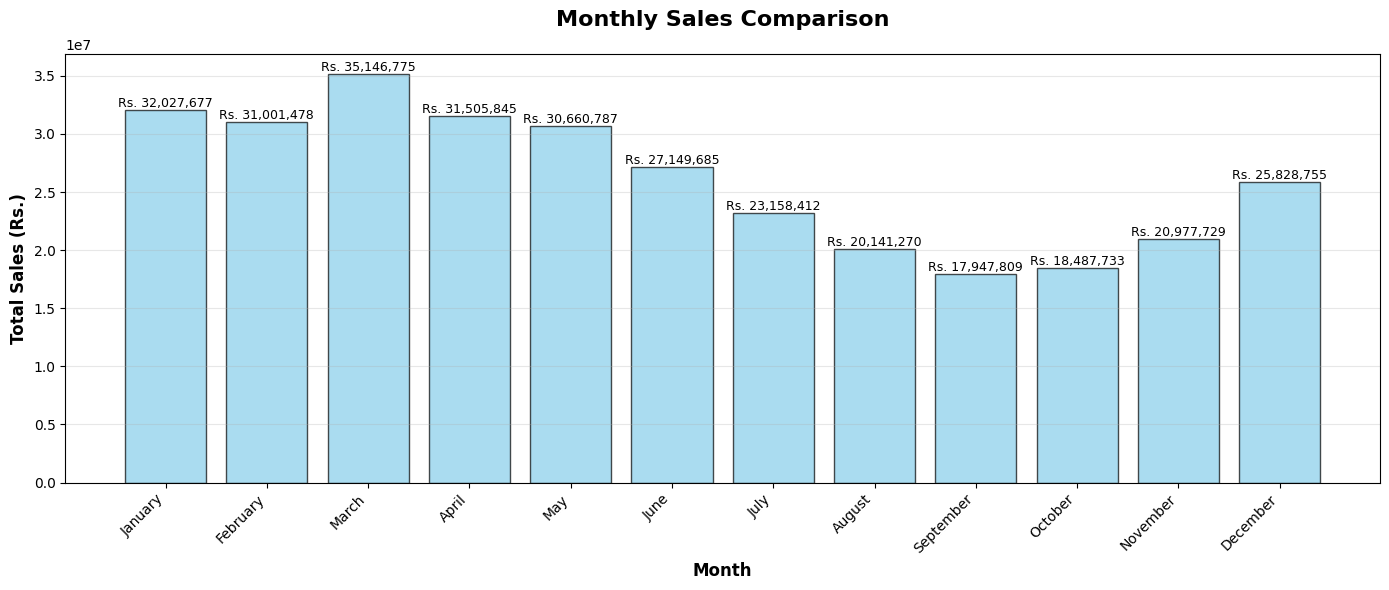

Monthly sales comparison visualized


In [11]:
# Plot 3: Monthly Sales Bar Chart
plt.figure(figsize=(14, 6))

colors = ['skyblue' if i < len(monthly_sales) else 'orange'
          for i in range(len(monthly_sales))]

bars = plt.bar(monthly_sales['Month_Name'], monthly_sales['Total_Sales'],
               color=colors, edgecolor='black', alpha=0.7)

plt.title('Monthly Sales Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (Rs.)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Rs. {height:,.0f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Monthly sales comparison visualized")

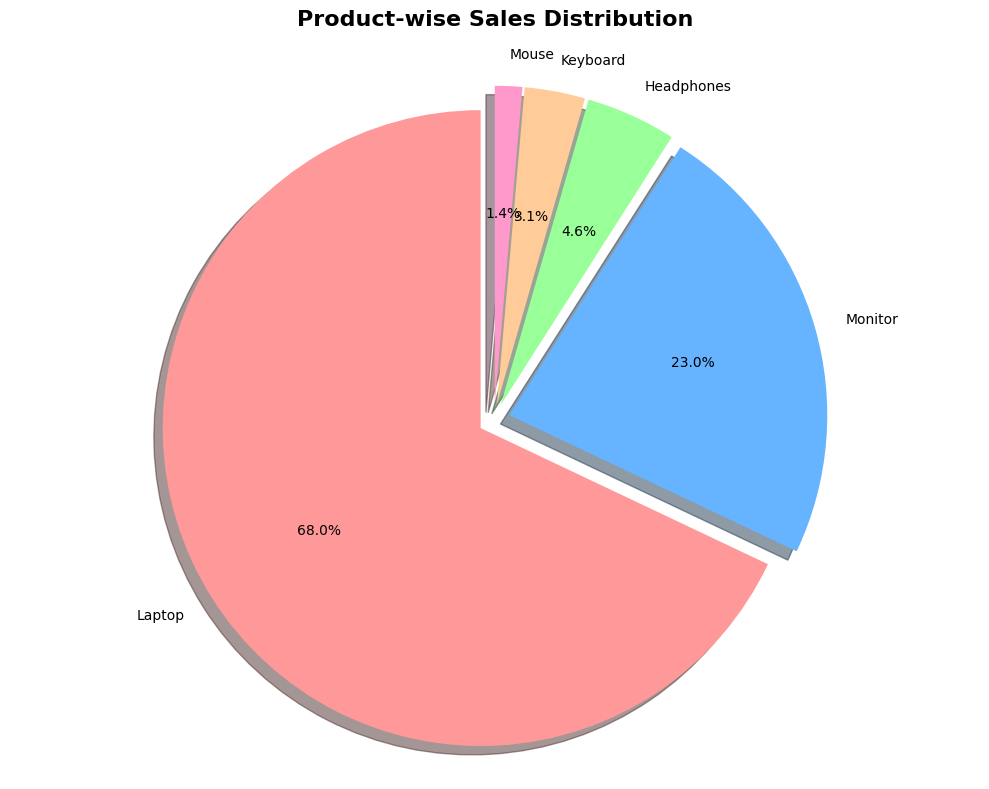

Product-wise sales distribution visualized


In [12]:
# Plot 4: Product-wise Sales Pie Chart
plt.figure(figsize=(10, 8))

colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = [0.05] * len(product_sales)

plt.pie(product_sales['Total_Sales'], labels=product_sales['Product'],
        autopct='%1.1f%%', startangle=90, colors=colors_pie,
        explode=explode, shadow=True)

plt.title('Product-wise Sales Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Product-wise sales distribution visualized")

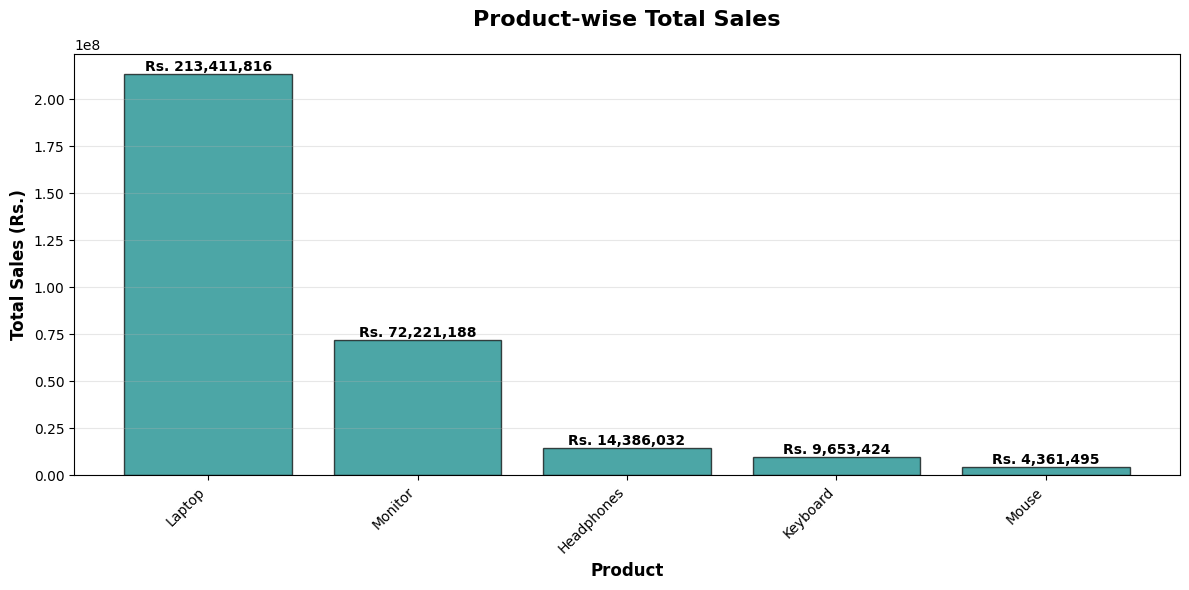

Product-wise sales comparison visualized


In [13]:
# Plot 5: Product-wise Sales Bar Chart
plt.figure(figsize=(12, 6))

bars = plt.bar(product_sales['Product'], product_sales['Total_Sales'],
               color='teal', edgecolor='black', alpha=0.7)

plt.title('Product-wise Total Sales', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (Rs.)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Rs. {height:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Product-wise sales comparison visualized")

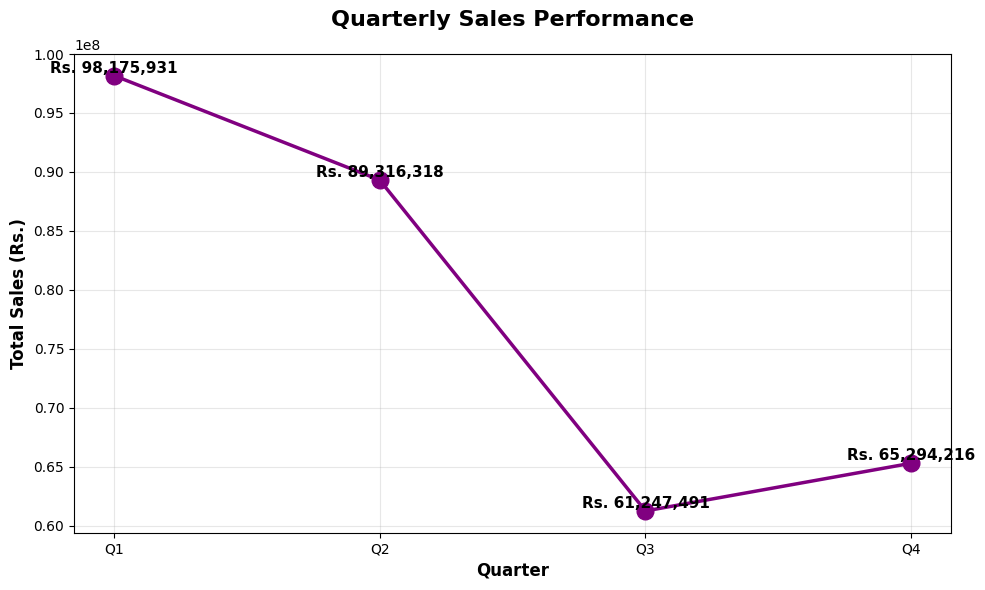

Quarterly sales trend visualized


In [14]:
# Plot 6: Quarterly Sales Trend
quarterly_sales = sales_data.groupby('Quarter')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total_Sales'],
         marker='o', color='purple', linewidth=2.5, markersize=12)

plt.title('Quarterly Sales Performance', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quarter', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (Rs.)', fontsize=12, fontweight='bold')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(True, alpha=0.3)

# Add value labels
for i, row in quarterly_sales.iterrows():
    plt.text(row['Quarter'], row['Total_Sales'],
             f"Rs. {row['Total_Sales']:,.0f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("Quarterly sales trend visualized")

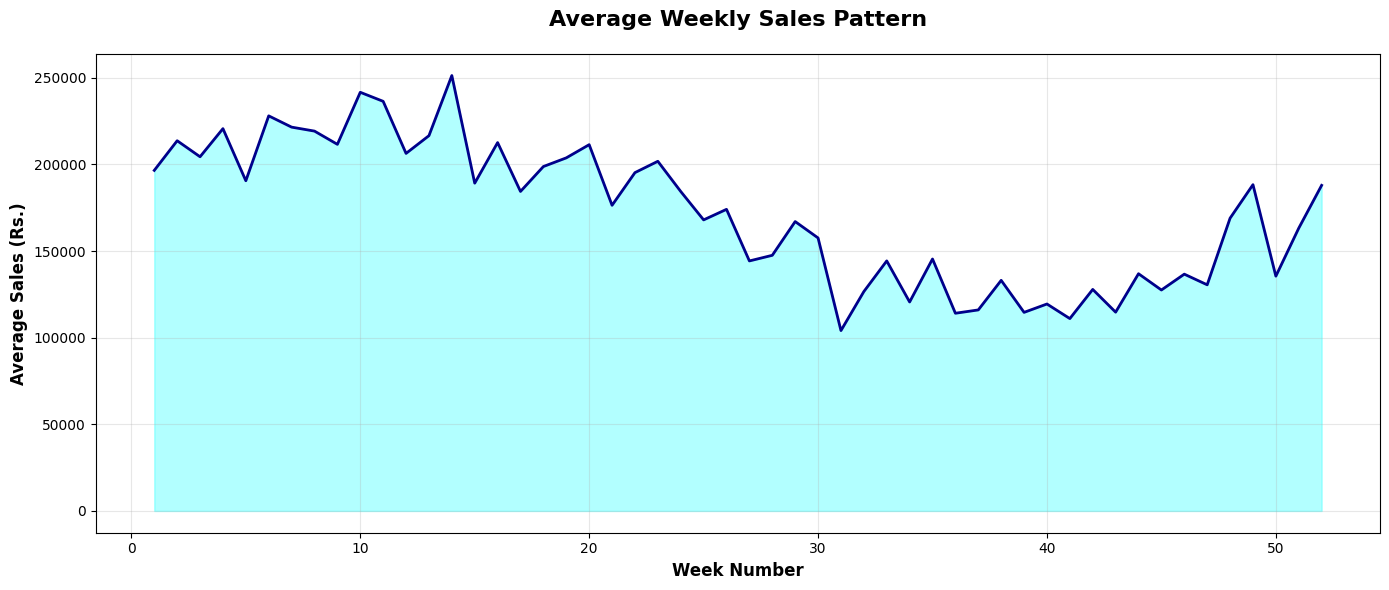

Weekly sales pattern visualized


In [15]:
# Plot 7: Average Sales by Week
weekly_sales = sales_data.groupby('Week')['Total_Sales'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.fill_between(weekly_sales['Week'], weekly_sales['Total_Sales'],
                 alpha=0.3, color='cyan')
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'],
         color='darkblue', linewidth=2)

plt.title('Average Weekly Sales Pattern', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Week Number', fontsize=12, fontweight='bold')
plt.ylabel('Average Sales (Rs.)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Weekly sales pattern visualized")

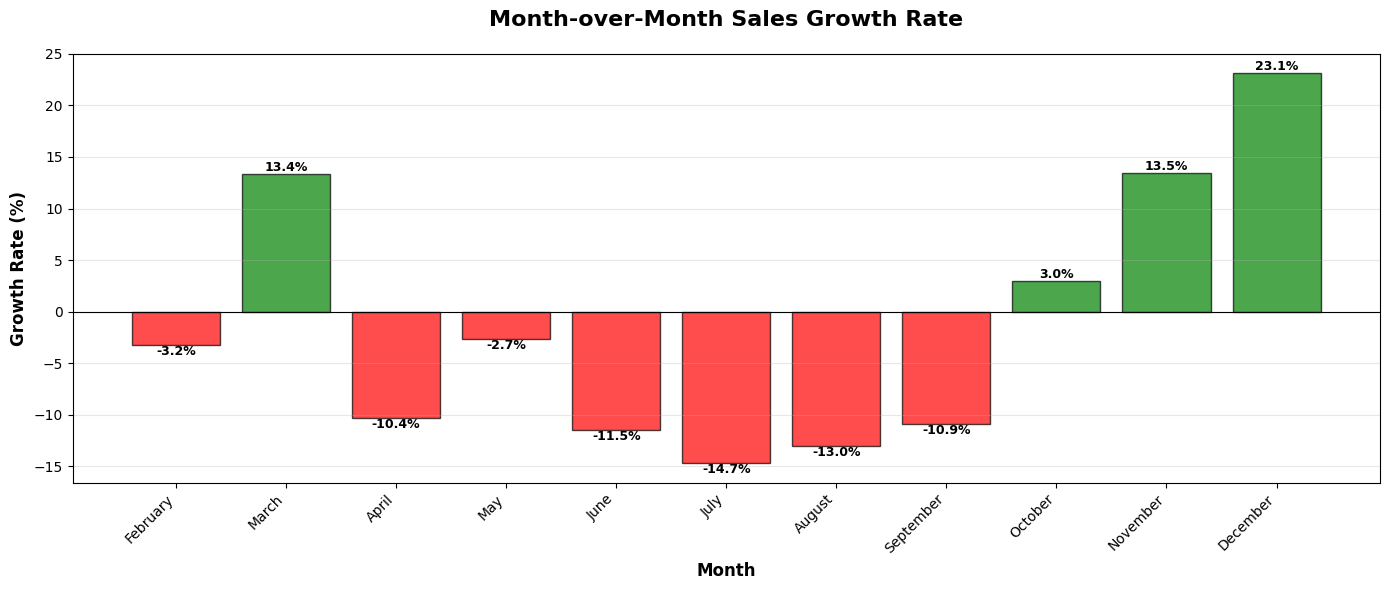

Sales growth rate visualized


In [16]:
# Plot 8: Month-over-Month Growth Rate
plt.figure(figsize=(14, 6))

# Remove first month (no growth data)
growth_data = monthly_sales[1:]

colors_growth = ['green' if x > 0 else 'red' for x in growth_data['Sales_Growth']]

plt.bar(growth_data['Month_Name'], growth_data['Sales_Growth'],
        color=colors_growth, edgecolor='black', alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.title('Month-over-Month Sales Growth Rate', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (month, growth) in enumerate(zip(growth_data['Month_Name'], growth_data['Sales_Growth'])):
    plt.text(i, growth, f'{growth:.1f}%',
             ha='center', va='bottom' if growth > 0 else 'top',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Sales growth rate visualized")

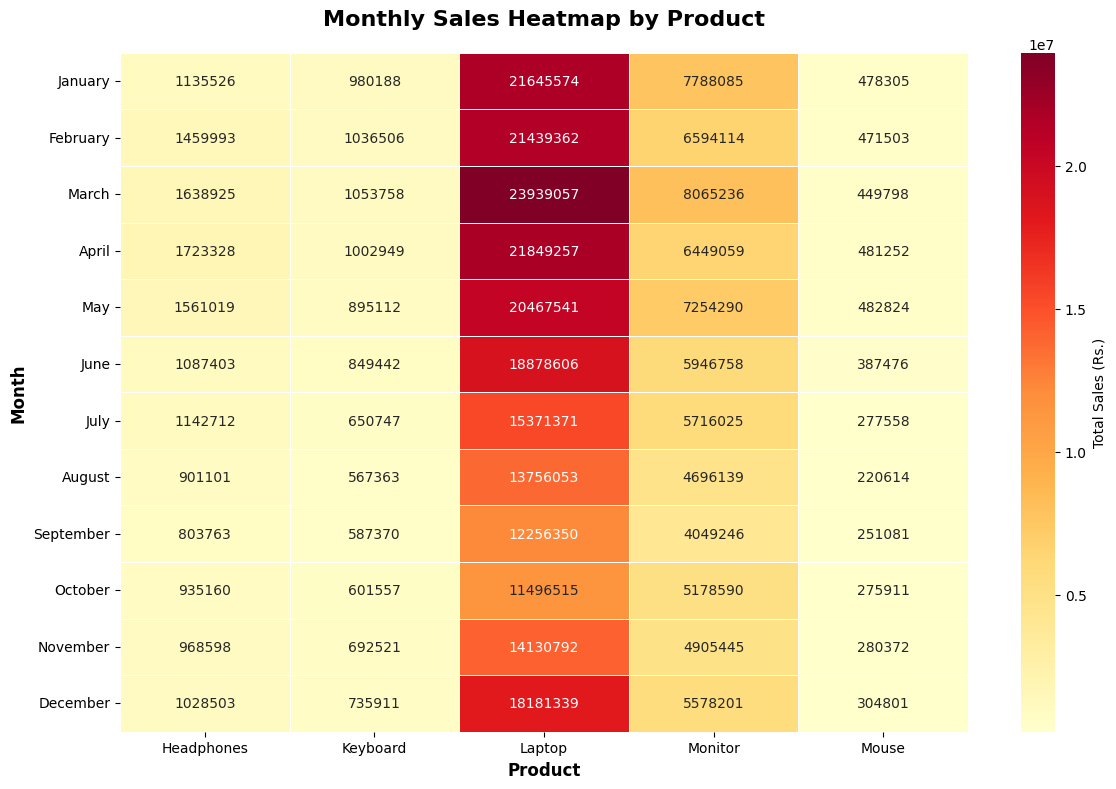

Sales heatmap visualized


In [17]:
# Plot 9: Heatmap of Product Sales by Month
pivot_data = sales_data.groupby(['Month_Name', 'Product'])['Total_Sales'].sum().reset_index()
pivot_table = pivot_data.pivot(index='Month_Name', columns='Product', values='Total_Sales')

# Reorder months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Total Sales (Rs.)'})

plt.title('Monthly Sales Heatmap by Product', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Month', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("Sales heatmap visualized")

In [18]:
# Task 3: Suggest adjustments based on observed trends

print("TASK 3: Business Insights and Suggested Adjustments")
print("="*70)

# 1. Overall Trend Analysis
if slope > 0:
    print("\n1. Overall Sales Trend: POSITIVE (Growing)")
    print(f"   - Sales are increasing by approximately Rs. {abs(slope):,.2f} per month")
    print("   - Recommendation: Maintain current strategies and scale operations")
else:
    print("\n1. Overall Sales Trend: NEGATIVE (Declining)")
    print(f"   - Sales are decreasing by approximately Rs. {abs(slope):,.2f} per month")
    print("   - Recommendation: Review pricing, marketing, and product quality")

# 2. Best Performing Product
best_product = product_sales.iloc[0]
print(f"\n2. Top Performing Product: {best_product['Product']}")
print(f"   - Total Sales: Rs. {best_product['Total_Sales']:,.2f}")
print(f"   - Contribution: {best_product['Percentage']:.2f}% of total revenue")
print("   - Recommendation: Increase stock and marketing for this product")

# 3. Worst Performing Product
worst_product = product_sales.iloc[-1]
print(f"\n3. Lowest Performing Product: {worst_product['Product']}")
print(f"   - Total Sales: Rs. {worst_product['Total_Sales']:,.2f}")
print(f"   - Contribution: {worst_product['Percentage']:.2f}% of total revenue")
print("   - Recommendation: Consider promotions or bundling strategies")

# 4. Best Month
best_month_idx = monthly_sales['Total_Sales'].idxmax()
best_month = monthly_sales.loc[best_month_idx]
print(f"\n4. Best Sales Month: {best_month['Month_Name']}")
print(f"   - Sales: Rs. {best_month['Total_Sales']:,.2f}")
print("   - Recommendation: Plan promotional campaigns before this period")

# 5. Worst Month
worst_month_idx = monthly_sales['Total_Sales'].idxmin()
worst_month = monthly_sales.loc[worst_month_idx]
print(f"\n5. Weakest Sales Month: {worst_month['Month_Name']}")
print(f"   - Sales: Rs. {worst_month['Total_Sales']:,.2f}")
print("   - Recommendation: Launch special offers during this month")

# 6. Growth Analysis
avg_growth = monthly_sales['Sales_Growth'].mean()
print(f"\n6. Average Monthly Growth Rate: {avg_growth:.2f}%")
if avg_growth > 5:
    print("   - Status: Excellent growth momentum")
    print("   - Recommendation: Continue current strategies")
elif avg_growth > 0:
    print("   - Status: Moderate growth")
    print("   - Recommendation: Explore new marketing channels")
else:
    print("   - Status: Negative growth")
    print("   - Recommendation: Urgent review of business strategy needed")

TASK 3: Business Insights and Suggested Adjustments

1. Overall Sales Trend: NEGATIVE (Declining)
   - Sales are decreasing by approximately Rs. 1,322,920.26 per month
   - Recommendation: Review pricing, marketing, and product quality

2. Top Performing Product: Laptop
   - Total Sales: Rs. 213,411,816.35
   - Contribution: 67.96% of total revenue
   - Recommendation: Increase stock and marketing for this product

3. Lowest Performing Product: Mouse
   - Total Sales: Rs. 4,361,494.56
   - Contribution: 1.39% of total revenue
   - Recommendation: Consider promotions or bundling strategies

4. Best Sales Month: March
   - Sales: Rs. 35,146,775.28
   - Recommendation: Plan promotional campaigns before this period

5. Weakest Sales Month: September
   - Sales: Rs. 17,947,809.08
   - Recommendation: Launch special offers during this month

6. Average Monthly Growth Rate: -1.21%
   - Status: Negative growth
   - Recommendation: Urgent review of business strategy needed


In [19]:
print("\nDetailed Action Plan Based on Analysis:")
print("="*70)

print("\nImmediate Actions (Next 30 days):")
print("1. Stock Management:")
print(f"   - Increase inventory for {best_product['Product']} by 20%")
print(f"   - Review pricing strategy for {worst_product['Product']}")

print("\n2. Marketing Strategy:")
if avg_growth < 2:
    print("   - Launch aggressive marketing campaign")
    print("   - Offer 10-15% discounts on slow-moving products")
    print("   - Introduce bundle offers combining fast and slow movers")
else:
    print("   - Continue current marketing efforts")
    print("   - Focus on customer retention programs")

print("\n3. Seasonal Planning:")
print(f"   - Prepare extra stock for {best_month['Month_Name']}")
print(f"   - Plan special promotions for {worst_month['Month_Name']}")

print("\nMedium-term Actions (Next 90 days):")
print("1. Product Portfolio:")
top_3_products = product_sales.head(3)['Product'].tolist()
print(f"   - Focus resources on top 3 products: {', '.join(top_3_products)}")
print("   - Consider introducing variants of best-selling products")

print("\n2. Customer Analysis:")
print("   - Conduct customer surveys to understand preferences")
print("   - Implement loyalty programs to increase repeat purchases")

print("\n3. Operational Efficiency:")
print("   - Optimize supply chain for high-demand products")
print("   - Negotiate better pricing with suppliers")

print("\nLong-term Strategy (6-12 months):")
print("1. Business Expansion:")
if slope > 0:
    print("   - Consider expanding to new markets")
    print("   - Explore online sales channels")
else:
    print("   - Focus on improving current operations")
    print("   - Conduct market research for new opportunities")

print("\n2. Technology Investment:")
print("   - Implement inventory management system")
print("   - Use data analytics for better demand forecasting")

print("\n3. Product Development:")
print("   - Research customer needs for new products")
print("   - Test new product categories based on market trends")


Detailed Action Plan Based on Analysis:

Immediate Actions (Next 30 days):
1. Stock Management:
   - Increase inventory for Laptop by 20%
   - Review pricing strategy for Mouse

2. Marketing Strategy:
   - Launch aggressive marketing campaign
   - Offer 10-15% discounts on slow-moving products
   - Introduce bundle offers combining fast and slow movers

3. Seasonal Planning:
   - Prepare extra stock for March
   - Plan special promotions for September

Medium-term Actions (Next 90 days):
1. Product Portfolio:
   - Focus resources on top 3 products: Laptop, Monitor, Headphones
   - Consider introducing variants of best-selling products

2. Customer Analysis:
   - Conduct customer surveys to understand preferences
   - Implement loyalty programs to increase repeat purchases

3. Operational Efficiency:
   - Optimize supply chain for high-demand products
   - Negotiate better pricing with suppliers

Long-term Strategy (6-12 months):
1. Business Expansion:
   - Focus on improving current o

In [20]:
# Create summary report
summary_report = {
    'Metric': [
        'Total Sales (All Time)',
        'Average Monthly Sales',
        'Predicted Next Month Sales',
        'Sales Growth Trend',
        'Best Performing Product',
        'Top Sales Month',
        'Average Growth Rate',
        'Number of Products',
        'Total Transactions'
    ],
    'Value': [
        f"Rs. {sales_data['Total_Sales'].sum():,.2f}",
        f"Rs. {monthly_sales['Total_Sales'].mean():,.2f}",
        f"Rs. {predicted_sales:,.2f}",
        'Increasing' if slope > 0 else 'Decreasing',
        best_product['Product'],
        best_month['Month_Name'],
        f"{avg_growth:.2f}%",
        sales_data['Product'].nunique(),
        len(sales_data)
    ]
}

summary_df = pd.DataFrame(summary_report)

print("Project Summary Report:")
print("="*70)
print(summary_df.to_string(index=False))

# Save all results
monthly_sales.to_csv('monthly_sales_analysis.csv', index=False)
product_sales.to_csv('product_performance.csv', index=False)
summary_df.to_csv('sales_summary_report.csv', index=False)

print("\n\nAll files saved successfully:")
print("- sales_data.csv (original dataset)")
print("- monthly_sales_analysis.csv (monthly breakdown)")
print("- product_performance.csv (product-wise analysis)")
print("- sales_summary_report.csv (executive summary)")

print("\n" + "="*70)
print("Project 5: Sales Predictions Using Basic Models - COMPLETED")
print("="*70)

Project Summary Report:
                    Metric              Value
    Total Sales (All Time) Rs. 314,033,956.23
     Average Monthly Sales  Rs. 26,169,496.35
Predicted Next Month Sales  Rs. 17,570,514.66
        Sales Growth Trend         Decreasing
   Best Performing Product             Laptop
           Top Sales Month              March
       Average Growth Rate             -1.21%
        Number of Products                  5
        Total Transactions               1825


All files saved successfully:
- sales_data.csv (original dataset)
- monthly_sales_analysis.csv (monthly breakdown)
- product_performance.csv (product-wise analysis)
- sales_summary_report.csv (executive summary)

Project 5: Sales Predictions Using Basic Models - COMPLETED
